In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('loan_sanction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
df = df.iloc[:,1:]

# Data Visualization

Kita akan melakukan visualisasi dari fitur kategorik dan numerik.

In [37]:
categorical_features = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

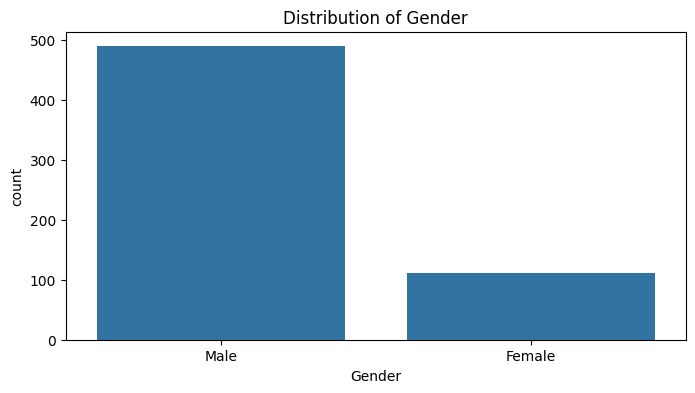

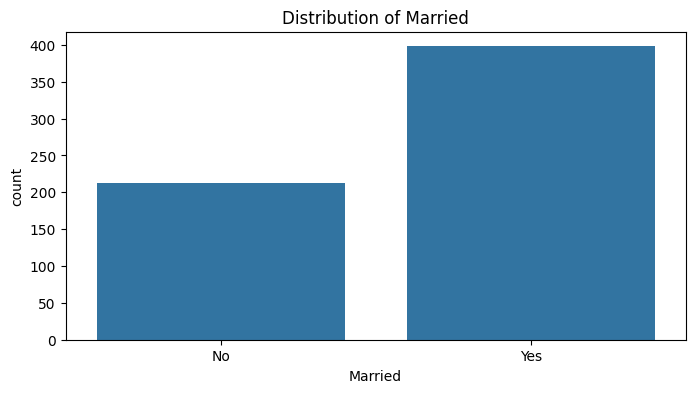

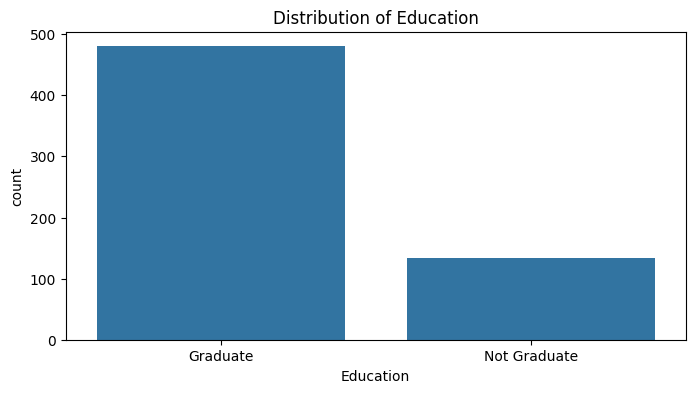

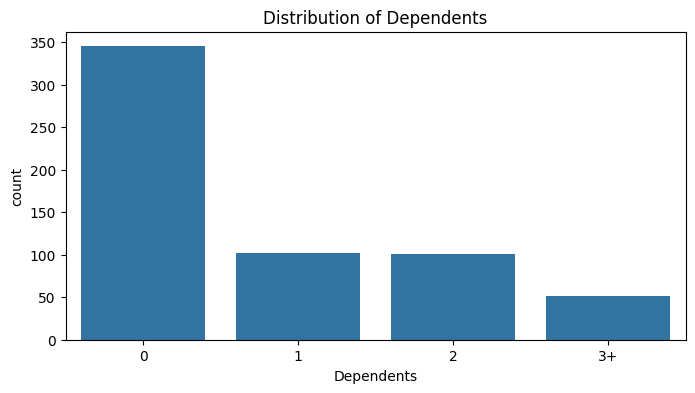

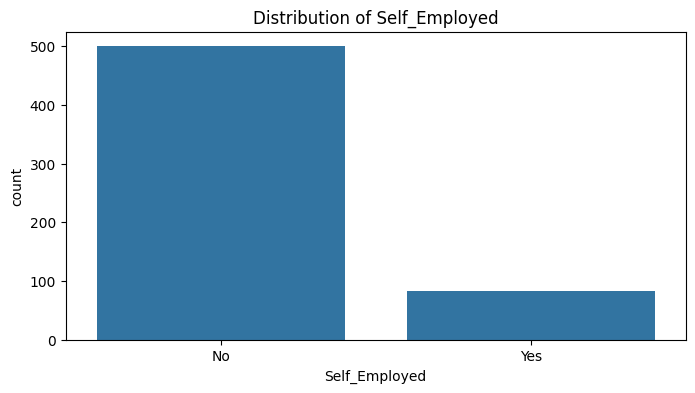

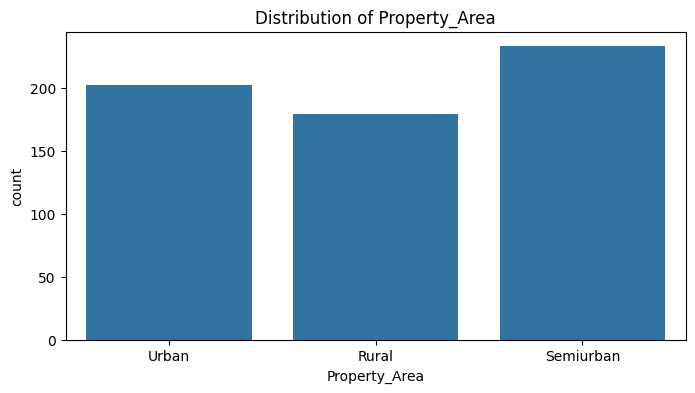

In [38]:
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

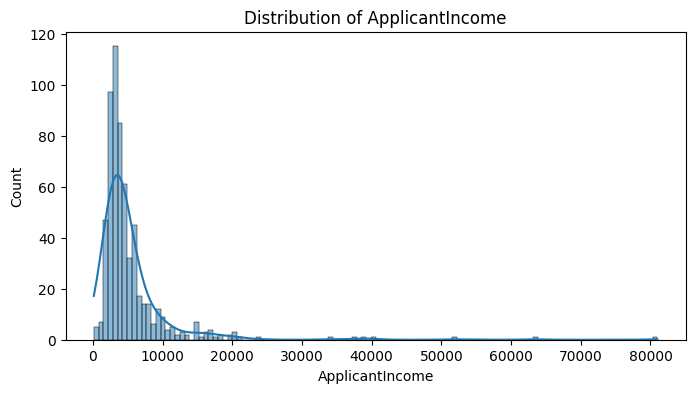

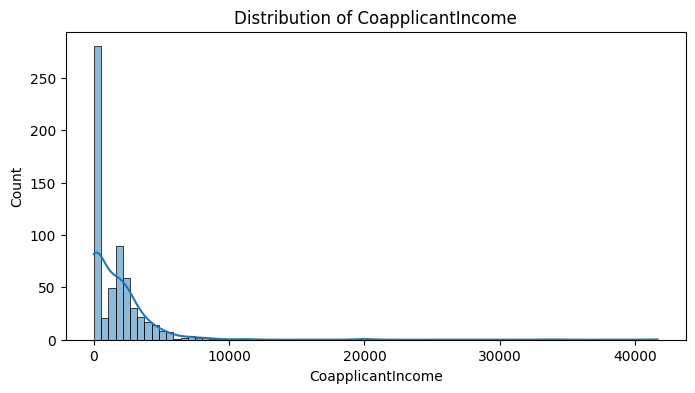

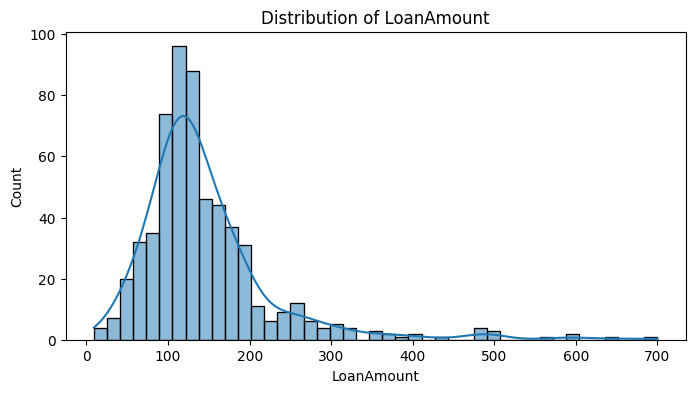

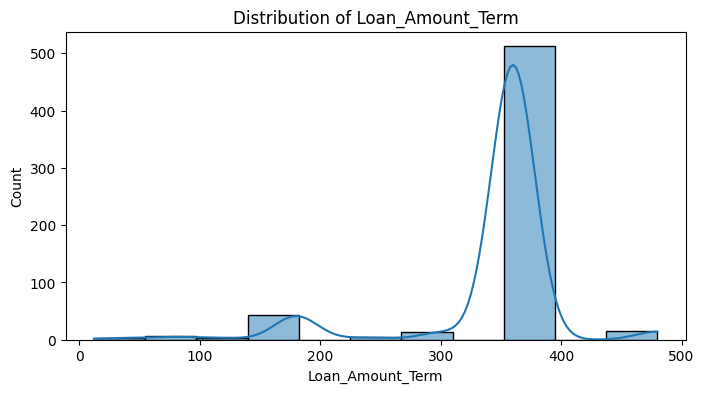

In [39]:
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(),kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

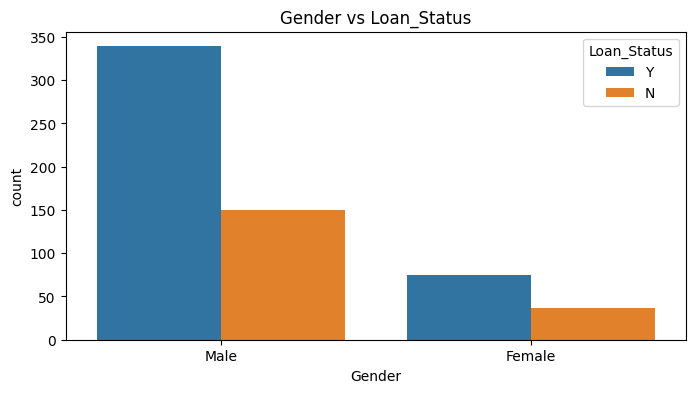

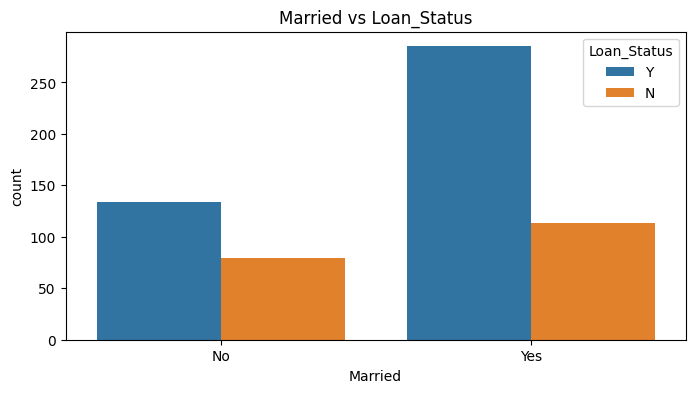

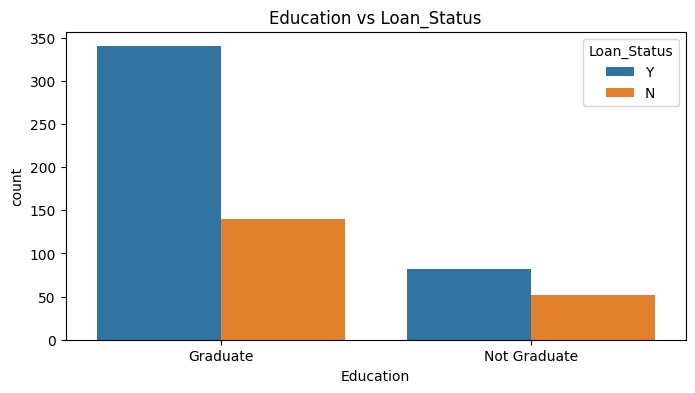

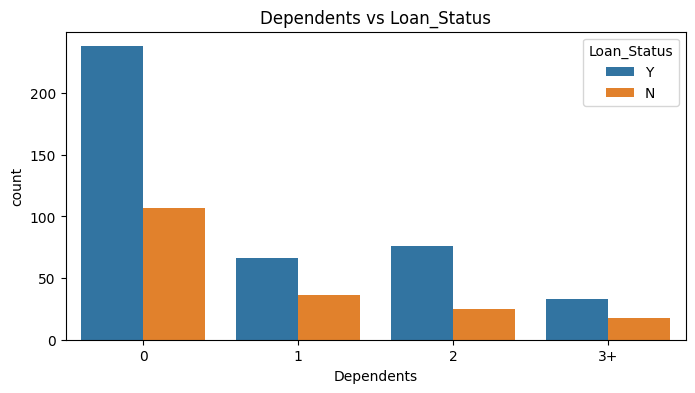

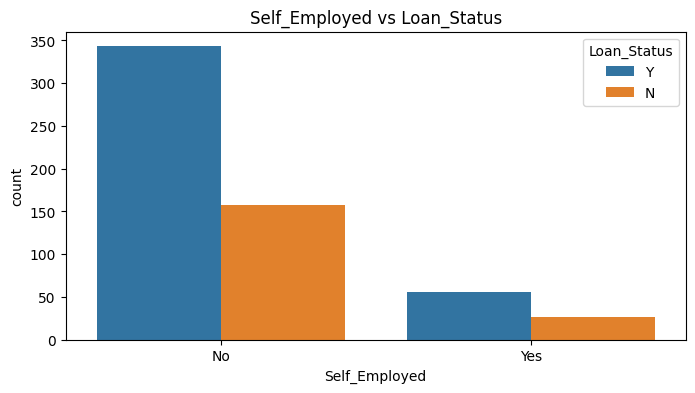

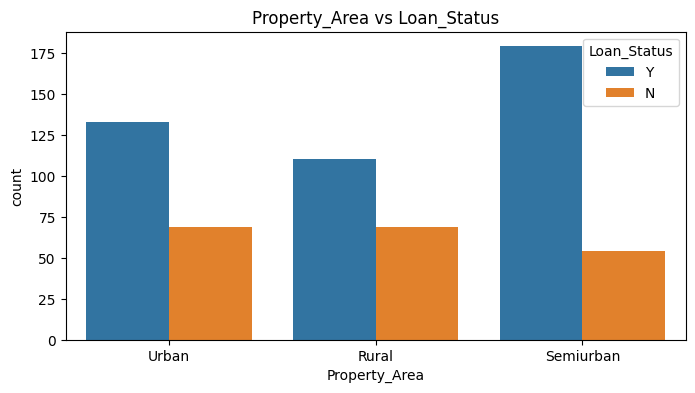

In [40]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Loan_Status', data=df)
    plt.title(f'{feature} vs Loan_Status')
    plt.show()

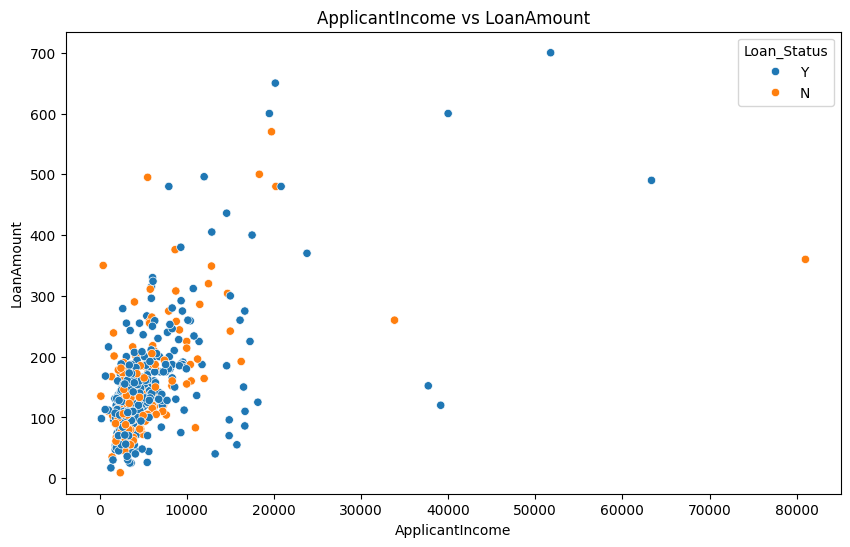

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('ApplicantIncome vs LoanAmount')
plt.show()

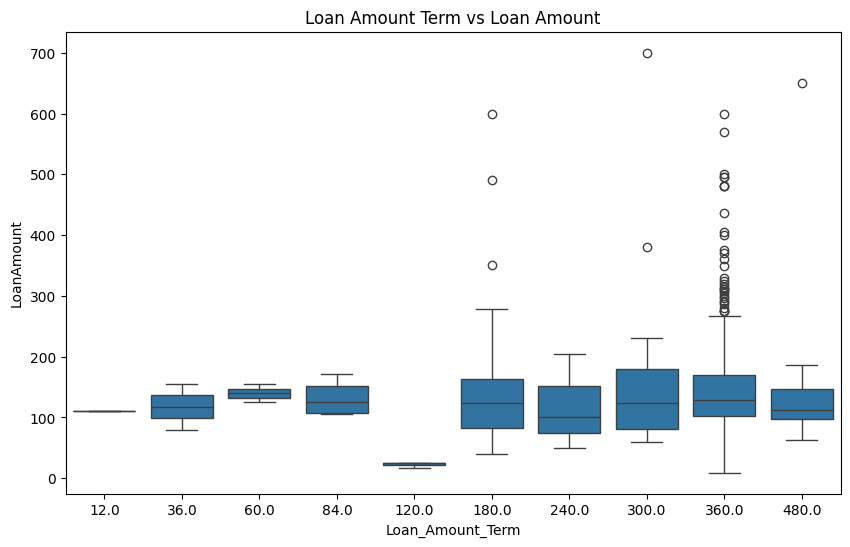

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Amount_Term', y='LoanAmount', data=df)
plt.title('Loan Amount Term vs Loan Amount')
plt.show()

# Data Preprocessing

In [43]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
df.dropna(inplace=True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [46]:
df.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
46,Male,Yes,1,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y


In [47]:
data = df.copy()

In [48]:
from sklearn.model_selection import train_test_split

# Split data
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# Label encoding
y_train = y_train.map({'Y':1, 'N':0})
y_test = y_test.map({'Y':1, 'N':0})

In [50]:
Numerical_columns = X.select_dtypes(include="number").columns.to_list()
Categorical_columns = X.select_dtypes(exclude="number").columns.to_list()
print(f"Numerical columns in the data : {Numerical_columns}")
print(f"Categorical columns in the data : {Categorical_columns}")

Numerical columns in the data : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns in the data : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [51]:
# pipeline
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector
# preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler,OrdinalEncoder

## 1. Numerical
numerical_pipeline = Pipeline(steps=[
                    ("selector", DataFrameSelector(Numerical_columns)),
                    ("impute", KNNImputer(n_neighbors=5)),
                    ("scaler", RobustScaler())
                    ])

## 2. categorical
category_pipeline = Pipeline(steps=[
                    ("selector", DataFrameSelector(Categorical_columns)),
                    ("impute", SimpleImputer(strategy="most_frequent")),
                    ("encoder", OrdinalEncoder())
                    ])

## 3. Union all together by feature union
all_pipe = FeatureUnion(transformer_list=[
             ("num", numerical_pipeline),
             ("categ", category_pipeline)
            ])

X_train_final = all_pipe.fit_transform(X_train)
X_test_final = all_pipe.transform(X_test)

In [52]:
# Handling imbalance data with SMOTE
y_train.value_counts()

Loan_Status
1    266
0    118
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train_final, y_train)

In [54]:
y_train_smote.value_counts()

Loan_Status
1    266
0    266
Name: count, dtype: int64

In [55]:
## tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## metrics 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [56]:
# Modelling using Decision Tree
dt = DecisionTreeClassifier(ccp_alpha=0.01, splitter='best')
dt.fit(X_train_final, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [57]:
train_pred = dt.predict(X_train_final)
test_pred = dt.predict(X_test_final)

In [58]:
#### `Accuracy Score`
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy of Training Data : {train_accuracy*100} %")
print(f"Accuracy of Test Data : {test_accuracy*100} %")

Accuracy of Training Data : 80.20833333333334 %
Accuracy of Test Data : 83.33333333333334 %


In [59]:
print(classification_report(y_test, test_pred))
print('Predicted labels of Test Data: ', test_pred)
print('Accuracy: ', accuracy_score(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96

Predicted labels of Test Data:  [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1]
Accuracy:  0.8333333333333334


In [60]:
# Feature Importance
dt.feature_importances_

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [61]:
feature_names = Numerical_columns + Categorical_columns
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Credit_History,1.0
CoapplicantIncome,0.0
ApplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
